## Visualization of Data

This is important for 2 reasons:

* _explore_ data
* _communicate_ data
    
_matplotlib_ is the right choice for simple bar charts, line charts, scatter plots, etc.

For other stuff,

- [Seaborn](http://seaborn.pydata.org) : this is an extension for the regular _matplotlib_

```
pip install seaborn
import seaborn as sns
```
- [D3](https://d3js.org) : flashy data visualizations (need to go over to js)
- [Bokeh](http://bokeh.pydata.org) : pythonic D3.js port
```
pip install bokeh
import bokeh as bok
```


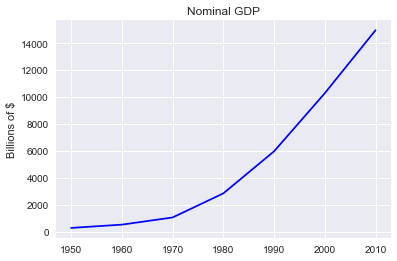

In [31]:
%matplotlib inline

from matplotlib import pyplot as plt

# Line
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]


def line():
    plt.plot(years, gdp, color='blue', marker='x', linestyle='solid')
    plt.title('Nominal GDP')
    plt.ylabel("Billions of $")
    plt.show()
    
line()

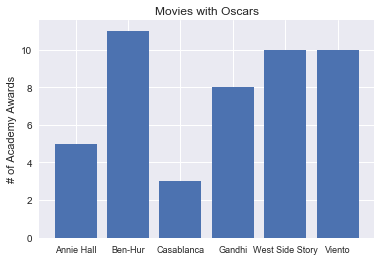

In [25]:
# Bar chart
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story", "Viento"]
num_oscars = [5, 11, 3, 8, 10, 10]


def bar_chart():
    # default for each is 0.8 in width, adding 0.1 for centering purposes
    xs = [i + 0.1 for i, _ in enumerate(movies)]
    
    # movies are gonna be on the x axis, with height delimited by oscars
    plt.bar(xs, num_oscars)

    plt.ylabel("# of Academy Awards")
    plt.title("Movies with Oscars")

    # label x axis with movie names at bar centers
    plt.xticks([i + 0.1 for i, _ in enumerate(movies)], movies, fontsize=9)
    plt.show()
    
bar_chart()

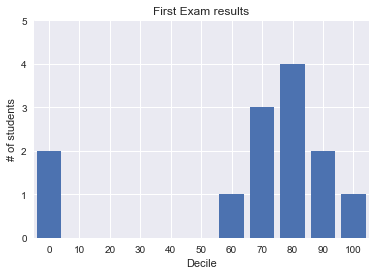

In [29]:
from collections import Counter

# Bar chart to show distribution
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]
decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)


def histogram_chart():
    # with correct height
    # with width of 8 places
    plt.bar([x for x in histogram.keys()], histogram.values(), 8)
    
    # x axis moves from -5 to 105, y axis from 0 to 5
    plt.axis([-5, 105, 0, 5])
    
    # label x axis from 0 to 10
    plt.xticks([10 * i for i in range(11)])
    
    plt.xlabel("Decile")
    plt.ylabel("# of students")
    plt.title("First Exam results")
    plt.show()
    
histogram_chart()

It all seems like taken out of a fairy tale. When I want to know the relationship between 2 samples, I can draw a `plt.plot()`. If I'm comparing distributions and difference between discrete values `plt.bar()`.

There are times when we just have few samples (like in the next one) and we can communicate differences and distributions wrongly.

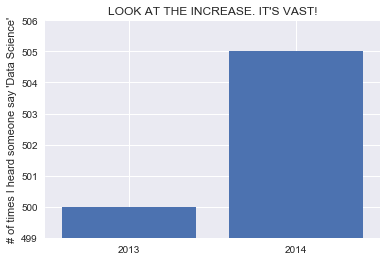

In [46]:
mentions = [500, 505]
years = [2013, 2014]

def barchart_ds(height_start, height_finish, title):
    plt.bar(years, mentions, 0.8)
    plt.xticks(years)
    
    plt.ylabel("# of times I heard someone say 'Data Science'")
    plt.ticklabel_format(trueOffset=False)
    
    # Here's the mistake!! Just taking in consideration a very narrow height interval
    plt.axis([2012.5, 2014.5, height_start, height_finish])
    plt.title(title)
    plt.show()
    
barchart_ds(499, 506, "LOOK AT THE INCREASE. IT'S VAST!")

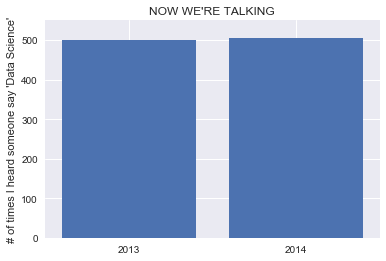

In [48]:
# Make axis more sensible
barchart_ds(0, 550, "NOW WE'RE TALKING")

## More

Cool. So far I've tackled two types of charts:

- simple plots: these provide a notion of a relationship between 2 samples
- bar charts: they give a sense of difference (at correct scale :-) ) of discrete values

The book now introduces line charts (used when showing `trends`)

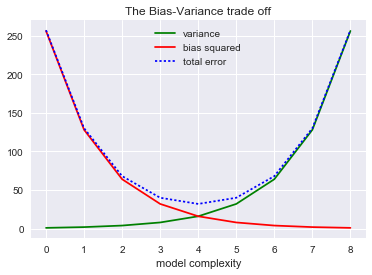

In [55]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = list(reversed(variance))
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

def plot_multiple():
    # We can make many calls to `plt.plot()`
    plt.plot(xs, variance, 'g-', label='variance')
    plt.plot(xs, bias_squared, 'r-', label='bias squared')
    plt.plot(xs, total_error, 'b:', label='total error')
    
    # loc=9 -> center
    plt.legend(loc=9)
    plt.xlabel("model complexity")
    plt.title("The Bias-Variance trade off")
    plt.show()
    
plot_multiple()

Next are Scatterplots: excellent to visualize the relationship between two sets of tuples or paired data.

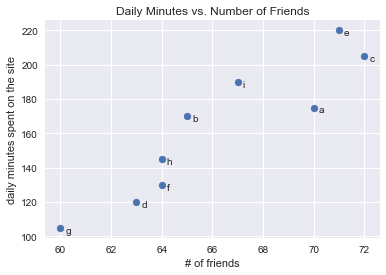

In [56]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
    
def make_chart_scatter_plot():

    plt.scatter(friends, minutes)
    
    # label each point
    for label, friend_count, minute_count in zip(labels, friends, minutes):
        plt.annotate(label,
                     xy=(friend_count, minute_count), # put the label with its point
                     xytext=(5, -5), # but slightly offset
                     textcoords='offset points')

    plt.title("Daily Minutes vs. Number of Friends")
    plt.xlabel("# of friends")
    plt.ylabel("daily minutes spent on the site")
    plt.show()
    
make_chart_scatter_plot()